In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
statlog_german_credit_data = fetch_ucirepo(id=144)

# data (as pandas dataframes)
X = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets

# metadata
print(statlog_german_credit_data.metadata)

# variable information
print(statlog_german_credit_data.variables)


{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

In [ ]:
statlog_german_credit_data.data.targets.value_counts()

class
1        700
2        300
Name: count, dtype: int64

In [ ]:
X.columns

Index(['Attribute1', 'Attribute2', 'Attribute3', 'Attribute4', 'Attribute5',
       'Attribute6', 'Attribute7', 'Attribute8', 'Attribute9', 'Attribute10',
       'Attribute11', 'Attribute12', 'Attribute13', 'Attribute14',
       'Attribute15', 'Attribute16', 'Attribute17', 'Attribute18',
       'Attribute19', 'Attribute20'],
      dtype='object')

In [ ]:
df=pd.concat([X, y], axis=1)
df.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [ ]:
df.dtypes

Attribute1     object
Attribute2      int64
Attribute3     object
Attribute4     object
Attribute5      int64
Attribute6     object
Attribute7     object
Attribute8      int64
Attribute9     object
Attribute10    object
Attribute11     int64
Attribute12    object
Attribute13     int64
Attribute14    object
Attribute15    object
Attribute16     int64
Attribute17    object
Attribute18     int64
Attribute19    object
Attribute20    object
class           int64
dtype: object

In [ ]:
df.isnull().sum()

Attribute1     0
Attribute2     0
Attribute3     0
Attribute4     0
Attribute5     0
Attribute6     0
Attribute7     0
Attribute8     0
Attribute9     0
Attribute10    0
Attribute11    0
Attribute12    0
Attribute13    0
Attribute14    0
Attribute15    0
Attribute16    0
Attribute17    0
Attribute18    0
Attribute19    0
Attribute20    0
class          0
dtype: int64

In [ ]:
df.shape

(1000, 21)

In [ ]:
df.Attribute9.unique()

array(['A93', 'A92', 'A91', 'A94'], dtype=object)

In [ ]:
columns_object=df.select_dtypes(include=['object']).columns
print(columns_object)

Index(['Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7',
       'Attribute9', 'Attribute10', 'Attribute12', 'Attribute14',
       'Attribute15', 'Attribute17', 'Attribute19', 'Attribute20'],
      dtype='object')


In [ ]:
def encode_columns(df, columns):
    from sklearn.preprocessing import LabelEncoder
    label_encoders = {}
    for column in columns:
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])
    return df, label_encoders
df_encoded, label_encoders = encode_columns(df.copy(), columns_object)
print(df_encoded.dtypes)

Attribute1     int64
Attribute2     int64
Attribute3     int64
Attribute4     int64
Attribute5     int64
Attribute6     int64
Attribute7     int64
Attribute8     int64
Attribute9     int64
Attribute10    int64
Attribute11    int64
Attribute12    int64
Attribute13    int64
Attribute14    int64
Attribute15    int64
Attribute16    int64
Attribute17    int64
Attribute18    int64
Attribute19    int64
Attribute20    int64
class          int64
dtype: object


In [ ]:
df_encoded.Attribute9.unique()

array([2, 1, 0, 3])

In [ ]:
df_encoded['class'].unique()

array([1, 2])

In [ ]:
df_encoded['class'] = df_encoded['class'].replace({1: 0, 2: 1})
df_encoded['class'].unique()

array([0, 1])

**Train test split**

In [ ]:
X = df_encoded.drop('class',axis='columns')
y = df_encoded['class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [ ]:
def monitor_class_distribution(y):
  class_distribution = np.bincount(y)
  if class_distribution[1]>class_distribution[0]:
    imbalance_ratio = class_distribution[1] / class_distribution[0]
  else:
    imbalance_ratio = class_distribution[0] / class_distribution[1]
  return imbalance_ratio

In [ ]:
imb_ratio=monitor_class_distribution(y)
print(imb_ratio)

2.3333333333333335


before applying sampling

In [ ]:
import time
import psutil
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

def train_resource_monitor(X_train, y_train):
  model= xgb.XGBClassifier(
      objective='binary:logistic',
      max_depth=3,
      learning_rate=0.1,
      n_estimators=100,
      subsample=0.8,
      colsample_bytree=0.8
  )
  cpu_usage = []
  memory_usage = []
  initial_cpu_percent = psutil.cpu_percent(interval=None)
  initial_memory_percent = psutil.virtual_memory().percent
  start_time = time.time()
  model.fit(X_train, y_train)
  end_time = time.time()
  execution_time = end_time - start_time
  final_cpu_percent = psutil.cpu_percent(interval=None)
  final_memory_percent = psutil.virtual_memory().percent
  size=len(y_train)
  print(f"Input size: {size}, Execution time: {execution_time:.6f} seconds")
  print(f"Initial CPU Usage: {initial_cpu_percent}%")
  print(f"Final CPU Usage: {final_cpu_percent}%")
  print(f"Initial Memory Usage: {initial_memory_percent}%")
  print(f"Final Memory Usage: {final_memory_percent}%")
  return model

In [ ]:
model1=train_resource_monitor(X_train, y_train)

Input size: 800, Execution time: 0.077674 seconds
Initial CPU Usage: 33.0%
Final CPU Usage: 80.0%
Initial Memory Usage: 9.3%
Final Memory Usage: 9.3%


In [ ]:
from sklearn.model_selection import KFold
# Define the number of folds for cross-validation
def k_fold_validation(X_train,y_train,model):
  X_train = X_train.to_numpy()
  y_train = y_train.to_numpy()
  k=5
  kf=KFold(n_splits=k,shuffle=True,random_state=42)
  cv_scores=[]
  cv_rocs=[]
  for train_index,val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    model.fit(X_train_fold, y_train_fold)
    y_pred_val = model.predict(X_val_fold)
    y_prob_roc=model.predict_proba(X_val_fold)[:, 1]
    accuracy = accuracy_score(y_val_fold, y_pred_val)
    roc_auc=roc_auc_score(y_val_fold, y_prob_roc)
    cv_scores.append(accuracy)
    cv_rocs.append(roc_auc)
    print("Cross-validation scores:", cv_scores)
    print("Average cross-validation score:", np.mean(cv_scores))
    print("Cross-validation roc-auc:", cv_rocs)
    print("Average cross-validation roc-auc:", np.mean(cv_rocs))
    print('-----------------------------------------------------------------')

In [ ]:
k_fold_validation(X_train, y_train,model1)

Cross-validation scores: [0.76875]
Average cross-validation score: 0.76875
Cross-validation roc-auc: [0.8177973892259606]
Average cross-validation roc-auc: 0.8177973892259606
-----------------------------------------------------------------
Cross-validation scores: [0.76875, 0.74375]
Average cross-validation score: 0.7562500000000001
Cross-validation roc-auc: [0.8177973892259606, 0.7637648809523809]
Average cross-validation roc-auc: 0.7907811350891707
-----------------------------------------------------------------
Cross-validation scores: [0.76875, 0.74375, 0.75]
Average cross-validation score: 0.7541666666666668
Cross-validation roc-auc: [0.8177973892259606, 0.7637648809523809, 0.7871853546910755]
Average cross-validation roc-auc: 0.789582541623139
-----------------------------------------------------------------
Cross-validation scores: [0.76875, 0.74375, 0.75, 0.75]
Average cross-validation score: 0.753125
Cross-validation roc-auc: [0.8177973892259606, 0.7637648809523809, 0.787185

In [ ]:
# Making predictions
y_pred = model1.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.725


In [ ]:
y_prob = model1.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.7230952380952381


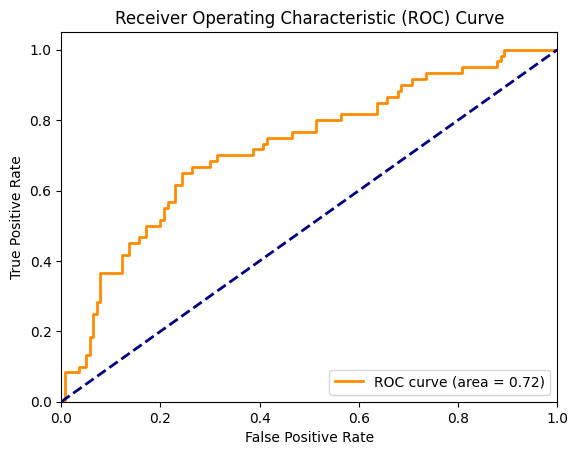

In [ ]:
# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.88      0.82       140
           1       0.56      0.37      0.44        60

    accuracy                           0.73       200
   macro avg       0.66      0.62      0.63       200
weighted avg       0.70      0.72      0.71       200



applying sampling

In [ ]:
X2 = df_encoded.drop('class',axis='columns')
y2 = df_encoded['class']

In [ ]:
print(X2.dtypes)

Attribute1     int64
Attribute2     int64
Attribute3     int64
Attribute4     int64
Attribute5     int64
Attribute6     int64
Attribute7     int64
Attribute8     int64
Attribute9     int64
Attribute10    int64
Attribute11    int64
Attribute12    int64
Attribute13    int64
Attribute14    int64
Attribute15    int64
Attribute16    int64
Attribute17    int64
Attribute18    int64
Attribute19    int64
Attribute20    int64
dtype: object


In [ ]:
X2.shape, y2.shape

((1000, 20), (1000,))

In [ ]:
y2.value_counts()

class
0    700
1    300
Name: count, dtype: int64

In [ ]:
df_encoded.columns[:-1].tolist()

['Attribute1',
 'Attribute2',
 'Attribute3',
 'Attribute4',
 'Attribute5',
 'Attribute6',
 'Attribute7',
 'Attribute8',
 'Attribute9',
 'Attribute10',
 'Attribute11',
 'Attribute12',
 'Attribute13',
 'Attribute14',
 'Attribute15',
 'Attribute16',
 'Attribute17',
 'Attribute18',
 'Attribute19',
 'Attribute20']

In [ ]:
import pandas as pd
from imblearn.over_sampling import KMeansSMOTE
from imblearn.under_sampling import ClusterCentroids

def adjust_sampling_parameters(X,y):
  # Apply KMeansSMOTE to the minority class
  kmeans_smote = KMeansSMOTE(sampling_strategy='auto', k_neighbors=8, cluster_balance_threshold=0.0)
  X_kmeans_smote, y_kmeans_smote = kmeans_smote.fit_resample(X, y)

  # Apply Cluster Centroids undersampling to the majority class
  cluster_centroids = ClusterCentroids(sampling_strategy='auto')
  X_cluster_centroids, y_cluster_centroids = cluster_centroids.fit_resample(X, y)

  # Concatenate the resampled data
  X_combined_resampled = np.concatenate((X_kmeans_smote, X_cluster_centroids), axis=0)
  y_combined_resampled = np.concatenate((y_kmeans_smote, y_cluster_centroids), axis=0)

  # Convert combined resampled data to DataFrame
  combined_df = pd.DataFrame(data=X_combined_resampled, columns=X.columns.tolist())
  combined_df['Class'] = y_combined_resampled
  return combined_df



In [ ]:
tolerance=0.2
def class_distribution_check(combined_df):
  X_combined = combined_df.drop('Class',axis='columns')
  y_combined = combined_df['Class']
  class_distribution=monitor_class_distribution(y_combined)
  while abs(class_distribution-1)>tolerance:
    #print(abs(class_distribution-1))
    combine_data=adjust_sampling_parameters(X_combined, y_combined)
    X_combined=combine_data.drop('Class',axis='columns')
    y_combined=combine_data['Class']
    class_distribution=monitor_class_distribution(y_combined)
  return X_combined, y_combined

In [ ]:
combined_df=adjust_sampling_parameters(X2,y2)
X_combined,y_combined=class_distribution_check(combined_df)
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

In [ ]:
print((X_combined.shape))

(2006, 20)


In [ ]:
'''import pandas as pd
from imblearn.over_sampling import KMeansSMOTE
from imblearn.under_sampling import ClusterCentroids

# Assuming you have X and y defined
# Apply KMeansSMOTE to the minority class
kmeans_smote = KMeansSMOTE(sampling_strategy='auto', k_neighbors=8, cluster_balance_threshold=0.0)
X_kmeans_smote, y_kmeans_smote = kmeans_smote.fit_resample(X, y)

# Apply Cluster Centroids undersampling to the majority class
cluster_centroids = ClusterCentroids(sampling_strategy='auto')
X_cluster_centroids, y_cluster_centroids = cluster_centroids.fit_resample(X, y)

# Concatenate the resampled data
X_combined_resampled = np.concatenate((X_kmeans_smote, X_cluster_centroids), axis=0)
y_combined_resampled = np.concatenate((y_kmeans_smote, y_cluster_centroids), axis=0)

# Convert combined resampled data to DataFrame
combined_df = pd.DataFrame(data=X_combined_resampled, columns=['Attribute1', 'Attribute2', 'Attribute3', 'Attribute4', 'Attribute5',
       'Attribute6', 'Attribute7', 'Attribute8', 'Attribute9', 'Attribute10',
       'Attribute11', 'Attribute12', 'Attribute13', 'Attribute14',
       'Attribute15', 'Attribute16', 'Attribute17', 'Attribute18',
       'Attribute19', 'Attribute20'])
combined_df['class'] = y_combined_resampled'''



In [ ]:
model2=train_resource_monitor(X_combined, y_combined)

Input size: 2006, Execution time: 0.058681 seconds
Initial CPU Usage: 31.6%
Final CPU Usage: 100.0%
Initial Memory Usage: 11.7%
Final Memory Usage: 11.7%


In [ ]:
k_fold_validation(X_train, y_train,model2)

Cross-validation scores: [0.8442367601246106]
Average cross-validation score: 0.8442367601246106
Cross-validation roc-auc: [0.9056992002484666]
Average cross-validation roc-auc: 0.9056992002484666
-----------------------------------------------------------------
Cross-validation scores: [0.8442367601246106, 0.8068535825545171]
Average cross-validation score: 0.8255451713395638
Cross-validation roc-auc: [0.9056992002484666, 0.8937888198757763]
Average cross-validation roc-auc: 0.8997440100621215
-----------------------------------------------------------------
Cross-validation scores: [0.8442367601246106, 0.8068535825545171, 0.8255451713395638]
Average cross-validation score: 0.8255451713395638
Cross-validation roc-auc: [0.9056992002484666, 0.8937888198757763, 0.8948285420131463]
Average cross-validation roc-auc: 0.8981055207124631
-----------------------------------------------------------------
Cross-validation scores: [0.8442367601246106, 0.8068535825545171, 0.8255451713395638, 0.831

In [ ]:
# Making predictions
y_pred = model2.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.835820895522388


In [ ]:
y_prob = model2.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.914770898829121


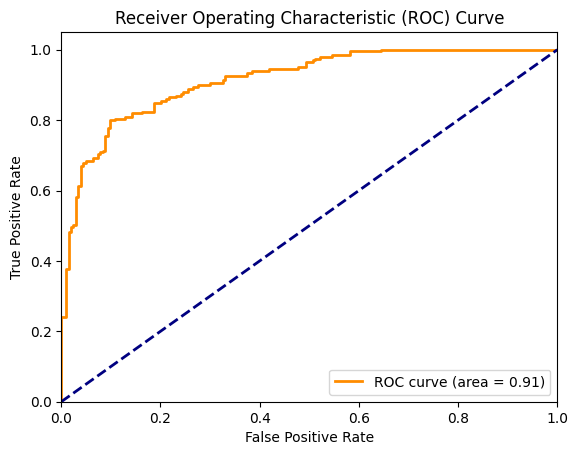

In [ ]:
# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       203
           1       0.85      0.81      0.83       199

    accuracy                           0.84       402
   macro avg       0.84      0.84      0.84       402
weighted avg       0.84      0.84      0.84       402



In [ ]:
import pickle

# Assuming you have trained an XGBoost model named 'model'

# Save the model to a file
with open('xgboost_model_credit.pkl', 'wb') as f:
    pickle.dump(model2, f)

In [ ]:
import pickle

# Load the model from the file
with open('xgboost_model_credit.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [ ]:
predictions = loaded_model.predict(X_test)

In [ ]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       203
           1       0.85      0.81      0.83       199

    accuracy                           0.84       402
   macro avg       0.84      0.84      0.84       402
weighted avg       0.84      0.84      0.84       402

